In [ ]:
# pip3 install opencv-python (python3, windows)


# Packages & Global data

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Imsge

In [2]:
# # TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras

# # Helper libraries

In [3]:
from itertools import combinations
import os
import fnmatch
from math import hypot

In [4]:
import dlib
from skimage import io


In [39]:
import time

# start_time = time.clock()
# main()
# print time.clock() - start_time, "seconds"

# Funcitons


In [6]:
def main_features(path):
    """Return a dataset that contain 4556 features and corresponding emotion_index, 4556 pariwise distance
    Input
    ----
        path of images folder
    Return
    -----
        a datafram contain 4556 features(68*67) column and one emotion_index column"""
    list_images = list_file_folder_int(path)
    df_68_distance_y = df_deatures_68_y(path,list_images)
    return df_68_distance_y

In [7]:
##load matlab file to python 
# import scipy.io
# mat = scipy.io.loadmat('./train_set/train_set/points/0001.mat')

In [8]:
def landmark(img):
    """
     Input
    -----
        img: a cv2.imread(file) or other cv2 picture file
    Return
    ------
        a lot of thing, including a landmark picture"""
    
    
    detector = dlib.get_frontal_face_detector()
    # dlib 68 points landmark detection 
    predictor = dlib.shape_predictor("C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat")
    # path of picture file
    #img=cv2.imread(file)
    
    #img = io.imread("2.jpg")
    # produce dlib window
    win = dlib.image_window()
    win.clear_overlay()
    win.set_image(img)

    dets = detector(img, 1)
    print("number of people's face：", len(dets))

    for k, d in enumerate(dets):

            print("The", k+1, "th face's location：",
                  "left:", d.left(),
                  "right:", d.right(),
                  "top:", d.top(),
                  "bottom:", d.bottom())

            width = d.right() - d.left()
            heigth = d.bottom() - d.top()

            print('face area：',(width*heigth))
    
            shape = predictor(img, d)
            # label the 68n points and plot them
            for i in range(68):
                cv2.circle(img, (shape.part(i).x, shape.part(i).y), 4, (0, 255, 0), -1, 8)
                cv2.putText(img, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
            # show the window and remove.
            cv2.imshow('face', img)
            cv2.waitKey(0)

In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat")
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        landmarks = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        for x, y in zip(xlist, ylist): #Store all landmarks in one list in the format x1,y1,x2,y2,etc.
            landmarks.append(x)
            landmarks.append(y)
    if len(detections) > 0:
        return landmarks
    else: #If no faces are detected, return error message to other function to handle
        landmarks = "error"
        return landmarks

In [10]:
def list_indx_emotion(emotion_type,label_data):
    """get a list of index of pictures in data, that labeled by given 
    Input
    ————
        emotion_type:str of what emotion want to filter
        label_data: dataframe of dataset
    Return
    --------
        list of picture's index by given emotion_type for given data"""
    df_emotion_type =  label_data[label_data['emotion_cat'] == emotion_type]
    if len(list(df_emotion_type['Index'])) == len(list(set(df_emotion_type['Index']))):
        return list(df_emotion_type['Index'])
    else:
        print ("something wrong,pls check",emotion_type,' in ',label_data)

In [11]:
def file_list(list_index):
    """return a list of str that match the file name of data
    Input
    -----
        list_index: a list of index, all int
    Return
    -----
        a list of str that has .jpg format"""
    list_file_name = []
    for index in list_index: 
        list_file_name.append(str(index).zfill(4)  + '.jpg')
    return list_file_name

In [12]:
##read every jpg file in the folder given file str name
def find_files(directory, pattern):
    """Method to find target files in one directory, including subdirectory
    Input
    -----
        directory: path
        pattern: filter pattern
    Return
    ------
         target file path
    """
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename
# for filename in find_files('./train_set/train_set/images', '0002.jpg'):
#     img = cv2.imread(filename, 0)

In [13]:
# #another way to reada all the jpg file in the reader
# import glob
# PATH = ''
# for file in glob.glob('./train_set/train_set/images' + '*.jpg'):
#     img = cv2.imread(file, -1)

In [14]:
def nested_array_cordinates(img):
    """get a netsed array for 68 cordinates of landmark by given img"""
    predictor_path = "C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat"
    #shape_predictor_68 face landmarks extract.after trained model 
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    dets = detector(img)

    #output face landmark points inside retangle
    #shape is points datatype

    for k, d in enumerate(dets):
        shape = predictor(img, d)

    vec = np.empty([68, 2], dtype = int)
    for b in range(68):
        vec[b][0] = shape.part(b).x
        vec[b][1] = shape.part(b).y
    return vec

In [31]:
def numpy_pixels(img):

    #img = cv2.imread(filename, 0)
    val = [val for sublist in img for val in sublist]
    x_pixels = np.array(val, 'float32')
    #x_pixels /= 255
    return x_pixels

In [16]:
def show_image_and_label(x):
    x_reshaped = x.reshape(750,1000)
    plt.imshow(x_reshaped, cmap= "gray",
              interpolation="nearest")
    plt.axis("off")
    plt.show()

In [17]:
def facial_detection(img):
    """return a croped front face image file"""
    #img=cv2.imread('./train_set/train_set/images/0001.jpg',0)
    faceCascade = cv2.CascadeClassifier('C:/Users/BurningBamboo/Desktop/ADS_proj3/haarcase/haarcascade_frontalface_default.xml')
    # Detect faces
    faces = faceCascade.detectMultiScale(
    img,
    scaleFactor=1.1,
    minNeighbors=5,
    flags=cv2.CASCADE_SCALE_IMAGE
    )# For each face
    for (x, y, w, h) in faces: 
        # Draw rectangle around the face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
        #print (x, y, w+x, h+y)
#         plt.figure(figsize=(12,8))
#         plt.imshow(img, cmap='gray')
#         plt.show()
        return img[y:y+h, x:x+w]

In [18]:
#from math import hypot

def distances2(p1,p2):
    """" x,y distances between two points."""
    x1,y1 = p1
    x2,y2 = p2
    return [x2 - x1, y2 - y1]

# from itertools import combinations

# array_cordinate_test = nested_array_cordinates(img_001_gray)

# list_of_coords = np.array(array_cordinate_test).tolist()

# list_distance = [distances(*combo) for combo in combinations(list_of_coords,2)]


In [19]:
def distances(p1,p2):
    """" x,y distances between two points."""
    x1,y1 = p1
    x2,y2 = p2
    return [abs(x2 - x1), abs(y2 - y1)]


In [20]:
def nested_list_distances(path_images,file_full_name_list):
    nested_list = []
    for img in file_full_name_list:
        for filename in find_files(path_images, img):
            img_gray = cv2.imread(filename, 0)
            
            array_cordinate_test = nested_array_cordinates(img_gray)

            list_of_coords = np.array(array_cordinate_test).tolist()

            list_distance_1 = [distances(*combo) for combo in combinations(list_of_coords,2)]
            list_distance = [j for i in list_distance_1 for j in i]
            nested_list.append(list_distance)
    return nested_list

In [21]:
def df_features_68(path,list_str_file):
    """return a df of features that like the one prof given
    Input
    -----
        path: path of data folder
        list_str_file: a list of str, the name of file
    Return
    ----
        a df, only Xs"""
    nested_list =  nested_list_distances(path,list_str_file)
    df_distances_features = pd.DataFrame(data=nested_list)
    return df_distances_features

In [22]:
def df_deatures_68_y(path,list_int_file):
    """main for create df of 68 points distances and emotion_idx df
    Input
    ----
        path:path of image file
        list_int_file: a list of int that contain the data index
    Return
    -----
        df of 68*67/2 xs features and relative emotion_index"""
    list_str_file = file_list(list_int_file)
    df_Xs = df_features_68(path,list_str_file)
    label_sub = label[label['Index'].isin(list_int_file)]
    y = list(label_sub['emotion_idx'])
    dataframe_combine = df_Xs.copy()
    dataframe_combine['emotion_index'] = y
    return dataframe_combine
    

In [23]:
def list_file_folder_int(path):
    """path
    Return list of file of 001,002 
    -----
        """
    files = [os.path.splitext(filename)[0] for filename in os.listdir(path)]
    list_data = files[1:]
    list_data = list(map(int, list_data))
    return list_data

In [48]:
def array_loop_files_pixels(path_images,file_full_name_list):
    nested_list = []
    for img in file_full_name_list:
        for filename in find_files(path_images, img):
            img_gray = cv2.imread(filename, 0)
            
            pixels_img = numpy_pixels(img_gray)
            nested_list.append(pixels_img)

            

#             list_distance_1 = [distances(*combo) for combo in combinations(list_of_coords,2)]
#             list_distance = [j for i in list_distance_1 for j in i]
#             nested_list.append(list_distance)
    return nested_list

In [61]:
def df_pixels_files(path,label):
    list_int_file = list_file_folder_int(path)
    label_sub = label[label['Index'].isin(list_int_file)]
    #file_full_name_list = file_list(list_file_folder_int(path))
    return pd.DataFrame({'pixel':array_loop_files_pixels(path,file_list(list_int_file)),'emotion_index':list(label_sub['emotion_idx'])})
    

# Data

### Same distance data as the 6006 pariwise distances RDATA file that professor's starting code gave BUT use the 68 points of landmark detection rather than 78 points.

In [65]:
label = pd.read_csv(r'C:\Users\BurningBamboo\Desktop\ADS_proj3\train_set\train_set\label.csv')

In [66]:
path_test_data = "C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/test_images"

In [67]:
path_train_data = "C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/train_images"

In [23]:
#df_test_68 = main_features("C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/test_images")

In [24]:
#df_train_68 = main_features("C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/train_images")

In [25]:
# df_train_68.to_csv('df_train_68_4556featurs_abs.csv')
# df_test_68.to_csv('df_test_68_4556features_abs.csv')

In [71]:
start_time = time.clock()
df_test_pixels = df_pixels_files(path_test_data,label)
print (time.clock() - start_time, "seconds")


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


158.32554680000067 seconds


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
start_time = time.clock()
df_train_pixels = df_pixels_files(path_train_data,label)
print (time.clock() - start_time, "seconds")


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


628.4331121 seconds


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
df_train_pixels.to_csv('df_pixel_train.csv')

In [72]:
df_test_pixels.to_csv('df_pixel_test.csv')

## Model work (working or not working code)

In [26]:
from sklearn.ensemble import AdaBoostClassifier # classify
from sklearn.ensemble import AdaBoostRegressor  # regression
from sklearn.tree import DecisionTreeClassifier
 
base_estimator = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=50, base_estimator=base_estimator, learning_rate=1)
# use decisition tree to classfy
clf.fit(dat_train_Xs, dat_train_y)

NameError: name 'dat_train_Xs' is not defined

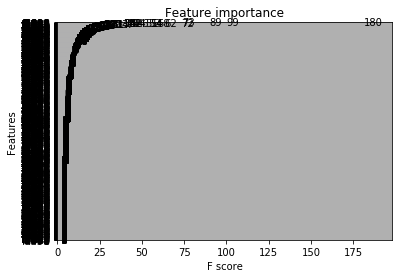

In [40]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(dat_train_Xs, dat_train_y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [50]:
y_pre = model.predict(dat_test_Xs)
y_pro = model.predict_proba(dat_test_Xs)
#print ("AUC Score : %f" % metrics.roc_auc_score(test_label, y_pro))
#print("Accuracy : %.4g" % metrics.accuracy_score(test_label, y_pre))
print (model) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Scratch works and test

In [28]:
#cv2.imshow('test',img)
path_test = 'C:/Users/BurningBamboo/Desktop/ADS_proj3/test_several'
img_001=cv2.imread('C:/Users/BurningBamboo/Desktop/ADS_proj3/test_several/0009.jpg',0)
#img_001_gray = cv2.cvtColor(img_001, cv2.COLOR_BGR2GRAY)

In [62]:
start_time = time.clock()
df_test = df_pixels_files(path_test,label)
print (time.clock() - start_time, "seconds")


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


4.9809619000002385 seconds


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_test

,pixel,emotion_index
0,"[173.0, 174.0, 175.0, 176.0, 177.0, 176.0, 175...",1
1,"[214.0, 215.0, 216.0, 217.0, 217.0, 217.0, 217...",1
2,"[190.0, 190.0, 190.0, 190.0, 190.0, 189.0, 187...",1
3,"[169.0, 171.0, 172.0, 172.0, 172.0, 171.0, 173...",1
4,"[185.0, 184.0, 183.0, 182.0, 182.0, 182.0, 182...",1
5,"[234.0, 235.0, 236.0, 237.0, 237.0, 237.0, 237...",1
6,"[179.0, 178.0, 178.0, 180.0, 182.0, 182.0, 181...",1
7,"[167.0, 167.0, 167.0, 168.0, 169.0, 170.0, 172...",1
8,"[171.0, 171.0, 171.0, 171.0, 171.0, 171.0, 171...",1
9,"[197.0, 195.0, 194.0, 195.0, 197.0, 199.0, 199...",1


In [37]:
file_list(list_file_folder_int(path_test))

['0010.jpg',
 '0011.jpg',
 '0012.jpg',
 '0013.jpg',
 '0014.jpg',
 '0015.jpg',
 '0017.jpg',
 '0018.jpg',
 '0019.jpg',
 '0020.jpg',
 '0021.jpg',
 '0022.jpg',
 '0023.jpg',
 '0025.jpg',
 '0026.jpg',
 '0027.jpg',
 '0028.jpg',
 '0029.jpg',
 '0030.jpg',
 '0031.jpg']

In [34]:
numpy_pixels(img_001)

array([187., 182., 178., ..., 178., 178., 178.], dtype=float32)

In [26]:
get_landmarks(img_001)

134

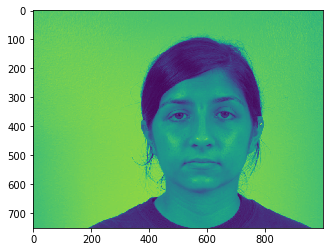

In [30]:
plt.imshow(img_001)
plt.show()

In [29]:
#landmark(img_001)

In [30]:
test_cor = nested_array_cordinates(img_001)

In [31]:
len(test_cor)

68

In [31]:
nested_list_distances(path_test,['0009.jpg'])

[[4,
  46,
  13,
  89,
  23,
  130,
  39,
  169,
  63,
  201,
  97,
  224,
  134,
  241,
  177,
  245,
  218,
  240,
  256,
  223,
  290,
  200,
  315,
  168,
  330,
  128,
  339,
  86,
  348,
  43,
  353,
  3,
  28,
  41,
  51,
  63,
  84,
  73,
  118,
  71,
  150,
  60,
  205,
  64,
  236,
  77,
  269,
  82,
  302,
  73,
  325,
  50,
  177,
  22,
  177,
  8,
  177,
  38,
  177,
  68,
  143,
  93,
  160,
  99,
  178,
  104,
  195,
  99,
  212,
  93,
  69,
  7,
  88,
  19,
  111,
  21,
  132,
  7,
  112,
  1,
  88,
  1,
  224,
  10,
  243,
  24,
  266,
  25,
  285,
  12,
  267,
  4,
  244,
  5,
  117,
  151,
  141,
  139,
  162,
  131,
  177,
  136,
  191,
  132,
  212,
  141,
  238,
  152,
  212,
  163,
  191,
  167,
  176,
  168,
  161,
  167,
  141,
  161,
  128,
  150,
  162,
  147,
  177,
  149,
  191,
  148,
  228,
  151,
  190,
  146,
  176,
  147,
  162,
  145,
  9,
  43,
  19,
  84,
  35,
  123,
  59,
  155,
  93,
  178,
  130,
  195,
  173,
  199,
  214,
  194,
  252,
  177,


In [30]:
test_array_001 = nested_array_cordinates(img_001)

In [31]:
test_array_001

array([[406, 375],
       [410, 422],
       [418, 466],
       [429, 507],
       [445, 546],
       [469, 579],
       [503, 602],
       [540, 618],
       [582, 623],
       [622, 617],
       [660, 600],
       [694, 578],
       [720, 546],
       [735, 506],
       [744, 463],
       [753, 419],
       [757, 372],
       [432, 337],
       [455, 314],
       [488, 304],
       [522, 306],
       [554, 316],
       [610, 312],
       [641, 300],
       [675, 295],
       [708, 304],
       [730, 328],
       [582, 355],
       [583, 385],
       [583, 415],
       [583, 445],
       [548, 470],
       [565, 476],
       [583, 481],
       [601, 476],
       [619, 471],
       [473, 370],
       [492, 358],
       [516, 356],
       [537, 370],
       [516, 377],
       [492, 379],
       [628, 368],
       [648, 353],
       [672, 352],
       [691, 365],
       [673, 373],
       [649, 372],
       [520, 529],
       [545, 516],
       [566, 508],
       [582, 513],
       [596,

In [74]:
#list_test = list_file_folder_int( "C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/test_images")

In [75]:
#df_test_68 = df_deatures_68_y("C:/Users/BurningBamboo/Desktop/ADS_proj3/train_set_shu/train_set/test_images",list_test)

In [76]:
#label = pd.read_csv(r'C:\Users\BurningBamboo\Desktop\ADS_proj3\train_set\train_set\label.csv')
# label_training = pd.read_csv('label_training_2000.csv')
# label_test = pd.read_csv('label_test_500.csv')

In [11]:
#dat_train = pd.read_csv('../output/dat_train.csv')

In [42]:
# dat_test = pd.read_csv('../output/dat_test.csv')
# dat_test_Xs = dat_test.as_matrix(columns=dat_test.columns[1:-1])
# dat_test_y = dat_test['emotion_idx'].to_numpy()

c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [29]:
# dat_train_Xs = dat_train.as_matrix(columns=dat_train.columns[1:-1])


c:\users\burningbamboo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 39,  19,   2, ...,  50, 100,  50],
       [ 30,  17,   5, ...,  57, 109,  52],
       [ 30,  14,   1, ...,  47,  87,  40],
       ...,
       [ 33,  18,   2, ...,  58, 116,  58],
       [ 33,  18,   1, ...,  49,  97,  48],
       [ 33,  20,   1, ...,  56, 111,  55]], dtype=int64)

In [36]:
#dat_train_y = dat_train['emotion_idx'].to_numpy()

In [10]:
#emotion_cat = list(set(label_training['emotion_cat']))

In [11]:
# list_suprised = list_indx_emotion('Surprised',label_training)
# suprised_file = file_list(list_suprised)

NameError: name 'list_indx_emotion' is not defined

In [12]:
# suprised_file = file_list(list_suprised)

NameError: name 'file_list' is not defined

In [13]:
# for filename in find_files('./train_set/train_set/images', suprised_file[3]):
#     img_raw = cv2.imread(filename)

In [ ]:
#landmark(facial_detection(img_001_gray))

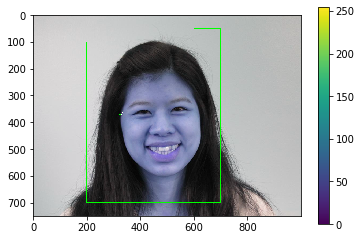

In [30]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
landmark('./train_set/train_set/images/0201.jpg')

number of people's face： 1
The 1 th face's location： left: 312 right: 633 top: 277 bottom: 598
face area： 103041


In [13]:

# image = cv2.imread(faces_folder_path+'/'+filename)
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# dets = detector(gray_image, 1)

In [120]:
detector = dlib.get_frontal_face_detector()
#cv2.imshow('test',img)
img_001=cv2.imread('./train_set/train_set/images/0001.jpg')
img_001_gray = cv2.cvtColor(img_001, cv2.COLOR_BGR2GRAY)

#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dets = detector(img_001_gray, 1)
predictor = dlib.shape_predictor("C:/Users/BurningBamboo/Desktop/ADS_proj3/shape_predictor_68_face_landmarks.dat")
shape = predictor(img_001_gray, dets[0])

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [45]:
for k,d in enumerate(dets):
    print(k,d)

0 [(332, 247) (718, 632)]


In [ ]:
cv2.rectangle(img, (247, 332), (632, 718), (0, 255, 0), 2)
plt.imshow(img)

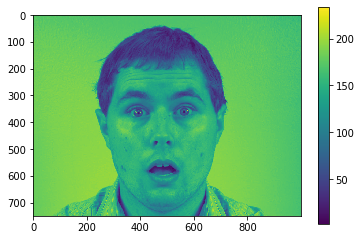

In [25]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# model = tf.keras.models.load_model('./model_v6_23.hdf5')
# predicted_class = np.argmax(model.predict(img_001_d))

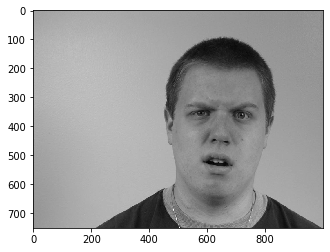

In [101]:
plt.imshow(img, cmap='gray')
plt.show()

In [16]:
##code for split the data into training and test data (run once and pickle the file)
import numpy
# x is the dataset's index
x =  np.asarray(list(label['Index']), dtype=np.int)
training_idx = numpy.random.randint(x.shape[0], size=2000)
test_idx = numpy.random.randint(x.shape[0], size=500)
training, test = x[training_idx,], x[test_idx,]

In [20]:
training

array([1271, 1176, 1578, ..., 1870, 1425, 2025])

In [ ]:
label_training = label[label['Index'].isin(training)]

In [17]:
label_training = label[label['Index'].isin(training)]
label_test = label[~label['Index'].isin(training)]

In [18]:
len(label_training)

1368

In [79]:
#label_training['emotion_cat'].hist()

In [80]:
#label_test['emotion_cat'].hist()

In [36]:
list_suprised = list_indx_emotion('Surprised',label_training)

In [6]:
simple = label[label['type']== 'simple']
compound = label[label['type']== 'compound']

In [112]:
traning_index = list(label_training['Index'])

In [124]:
traning_file_name = []
for num in traning_index: 
    traning_file_name.append(str(num).zfill(4)  + '.jpg')

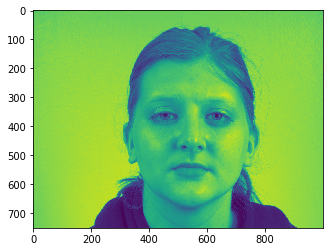

In [49]:
plt.imshow(img_001)
plt.show()

In [25]:
import numpy as np
image = '1 2 3 4 5 6'
image_width, image_height = 2, 3
result = np.fromstring(image, dtype=int, sep=" ").reshape((image_height, image_width))

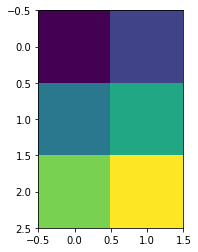

In [29]:
plt.imshow(result)
plt.show()

In [50]:
win = dlib.image_window()
win.clear_overlay()
win.set_image(img_001)

None


In [87]:
img_001.shape

(750, 1000)